## **6.1: Sourcing Open Data**

### **Step 1: Sourcing Data**

#### **Data Source:** [Kaggle - US Accidents (2016 - 2023)](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents)
The dataset covers car accidents across 49 U.S. states from February 2016 to March 2023. It was compiled via APIs streaming traffic data from transportation departments, law enforcement, cameras, and roadway sensors. In total, it contains about 7.7 million accident records.

### **Step 2: Importing libraries**
Raw data from 2016–2023 is split into yearly files and will be merged into one dataset to improve analysis, track trends, and identify patterns.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### **Step 3: Creating/defining data path**

In [2]:
# Creating shortcut for data file

path = r'/Users/anjanpakhrin/Documents/US Accidents Analysis 2016-2023'

In [3]:
# Defining paths to File

df_us_accidents = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'US_Accidents_2016-2023.csv'), index_col = False)

### **Step 4: Data profiling**

In [4]:
# Checking data structure and types

print(df_us_accidents.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
# Checking output

df_us_accidents.head()

ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          False        False          Night   
1   False  False           False          False        False          Night   
2   False  False           False           True        False          Night   
3   False  False           False          False        False          Night   
4   False  False           False           True        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                   Day  
2          Night               Day                   Day  
3            Day               Day                   Day  
4            Day               Day                   Day  

[5 rows x 46 columns]

In [6]:
# Checking for missing states:
state_coverage = df_us_accidents['State'].unique()
all_states = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA',
              'KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ',
              'NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT',
              'VA','WA','WV','WI','WY']

missing_states = set(all_states) - set(state_coverage)
print(f"Missing states: {missing_states}")

Missing states: {'AK', 'HI'}


In [7]:
# Checking actual number of unique states in the dataset

actual_state_count = df_us_accidents['State'].nunique()
print(f"Actual unique states in dataset: {actual_state_count}")

Actual unique states in dataset: 49


In [8]:
# List all states present

states_present = sorted(df_us_accidents['State'].unique())
print(f"States present: {states_present}")

States present: ['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


In [9]:
# Double-check by counting state occurrences

state_counts = df_us_accidents['State'].value_counts()
print(f"\nState counts:\n{state_counts}")


State counts:
State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
AL     101044
UT      97079
CO      90885
OK      83647
MO      77323
CT      71005
IN      67224
MA      61996
WI      34688
KY      32254
NE      28870
MT      28496
IA      26307
AR      22780
NV      21665
KS      20992
DC      18630
RI      16971
MS      15181
DE      14097
WV      13793
ID      11376
NM      10325
NH      10213
WY       3757
ND       3487
ME       2698
VT        926
SD        289
Name: count, dtype: int64


In [10]:
# Checking for descriptive stats

df_us_accidents.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  7.728394e+06  7.728394e+06  7.728394e+06  4.325632e+06  4.325632e+06   
mean   2.212384e+00  3.620119e+01 -9.470255e+01  3.626183e+01 -9.572557e+01   
std    4.875313e-01  5.076079e+00  1.739176e+01  5.272905e+00  1.810793e+01   
min    1.000000e+00  2.455480e+01 -1.246238e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.339963e+01 -1.172194e+02  3.346207e+01 -1.177543e+02   
50%    2.000000e+00  3.582397e+01 -8.776662e+01  3.618349e+01 -8.802789e+01   
75%    2.000000e+00  4.008496e+01 -8.035368e+01  4.017892e+01 -8.024709e+01   
max    4.000000e+00  4.900220e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  7.728394e+06    7.564541e+06   5.729375e+06  7.554250e+06   
mean   5.618423e-01    6.166329e+01   5.825105e+01  6.483104e+01   
std    1.776811e+00    1.901365e+01   2.238983e+01  2.282097e+01   
min    0.000000e+00   -8.900000e+01  -8.900000e+01  1.000000e+00   
25%    0.000000e+00    4.900000e+01   4.300000e+01  4.800000e+01   
50%    3.000000e-02    6.400000e+01   6.200000e+01  6.700000e+01   
75%    4.640000e-01    7.600000e+01   7.500000e+01  8.400000e+01   
max    4.417500e+02    2.070000e+02   2.070000e+02  1.000000e+02   

       Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  
count  7.587715e+06    7.551296e+06     7.157161e+06       5.524808e+06  
mean   2.953899e+01    9.090376e+00     7.685490e+00       8.407210e-03  
std    1.006190e+00    2.688316e+00     5.424983e+00       1.102246e-01  
min    0.000000e+00    0.000000e+00     0.000000e+00       0.000000e+00  
25%    2.937000e+01    1.000000e+01     4.600000e+00       0.000000e+00  
50%    2.986000e+01    1.000000e+01     7.000000e+00       0.000000e+00  
75%    3.003000e+01    1.000000e+01     1.040000e+01       0.000000e+00  
max    5.863000e+01    1.400000e+02     1.087000e+03       3.647000e+01

### **Step 5: Consistency Checks & Cleaning Data**
#### **Step 5.1: Checking Missing Values**

In [11]:
# Checking missing values and calculating percentage of missing value

def missing_report(df_us_accidents):
    miss_count = df_us_accidents.isna().sum()
    miss_pct = (miss_count / len(df_us_accidents) * 100).round(2)
    rep = pd.concat([miss_count, miss_pct], axis=1)
    rep.columns = ['missing_count','missing_pct']
    return rep.sort_values('missing_pct', ascending=False)

missing_before = missing_report(df_us_accidents)
missing_before.head(40)                                # show top missing columns

missing_count  missing_pct
End_Lat                      3402762        44.03
End_Lng                      3402762        44.03
Precipitation(in)            2203586        28.51
Wind_Chill(F)                1999019        25.87
Wind_Speed(mph)               571233         7.39
Visibility(mi)                177098         2.29
Wind_Direction                175206         2.27
Humidity(%)                   174144         2.25
Weather_Condition             173459         2.24
Temperature(F)                163853         2.12
Pressure(in)                  140679         1.82
Weather_Timestamp             120228         1.56
Nautical_Twilight              23246         0.30
Civil_Twilight                 23246         0.30
Sunrise_Sunset                 23246         0.30
Astronomical_Twilight          23246         0.30
Airport_Code                   22635         0.29
Street                         10869         0.14
Timezone                        7808         0.10
Zipcode                         1915         0.02
Traffic_Calming                    0         0.00
Railway                            0         0.00
Roundabout                         0         0.00
Station                            0         0.00
Stop                               0         0.00
Country                            0         0.00
Traffic_Signal                     0         0.00
Junction                           0         0.00
Turning_Loop                       0         0.00
End_Time                           0         0.00
Start_Time                         0         0.00
Severity                           0         0.00
No_Exit                            0         0.00
Crossing                           0         0.00
Give_Way                           0         0.00
Bump                               0         0.00
Amenity                            0         0.00
Start_Lat                          0         0.00
Start_Lng                          0         0.00
Distance(mi)                       0         0.00

#### **Step 5.2: Handling Missing Values**

In [12]:
# Drop columns End_Lat, End_Lng, Wind_Chill(F)

columns_to_drop = ['End_Lat', 'End_Lng']
df_us_accidents_drop = df_us_accidents.drop(columns=columns_to_drop)

In [13]:
# Copy to avoid chained assignment issues
df_us_accidents_impute = df_us_accidents_drop.copy()

# Imputing "Wind_Chill(F)" and "Precipitation(in)" with 0
cols_zero_impute = ['Precipitation(in)', 'Wind_Chill(F)']
df_us_accidents_impute[cols_zero_impute] = df_us_accidents_impute[cols_zero_impute].fillna(0)

# Imputing numerical weather variables with median
num_col_impute = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
for col in num_col_impute:
    df_us_accidents_impute[col] = df_us_accidents_impute[col].fillna(df_us_accidents_impute[col].median())

# Imputing categorical variables with mode
cat_cols_impute = ['Weather_Condition', 'Wind_Direction', 'Sunrise_Sunset', 
                   'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
for col in cat_cols_impute:
    df_us_accidents_impute[col] = df_us_accidents_impute[col].fillna(df_us_accidents_impute[col].mode()[0])

In [14]:
# Verifying missing value handling

def missing_table(df_us_accidents_impute):
    missing_count = df_us_accidents_impute.isnull().sum()
    missing_pct = 100 * df_us_accidents_impute.isnull().mean()
    return pd.DataFrame({'missing_count': missing_count, 'missing_pct': missing_pct}).query("missing_count > 0")
missing_table(df_us_accidents_impute)

missing_count  missing_pct
Description                    5     0.000065
Street                     10869     0.140637
City                         253     0.003274
Zipcode                     1915     0.024779
Timezone                    7808     0.101030
Airport_Code               22635     0.292881
Weather_Timestamp         120228     1.555666

Further cleaning for remaining columns - imputing and dropping rows with missing values

In [15]:
# Dropping rows with missing Description (very few)
df_us_accidents_impute = df_us_accidents_impute[df_us_accidents_impute['Description'].notna()]

# Imputing rows for categorical with "Unknown"
cat_fill_unknown = ['Street', 'City', 'Zipcode']
for col in cat_fill_unknown:
    df_us_accidents_impute[col] = df_us_accidents_impute[col].fillna("Unknown")

# Imputing rows for Timezone with mode
df_us_accidents_impute['Timezone'] = df_us_accidents_impute['Timezone'].fillna(df_us_accidents_impute['Timezone'].mode()[0])

# Dropping rows for Airport_Code and Weather_Timestamp
df_us_accidents_impute = df_us_accidents_impute.drop(columns=['Airport_Code', 'Weather_Timestamp'])

Verifying the missing value handling

In [16]:
# Checking missing values in the entire DataFrame

print("Total missing values:", df_us_accidents_impute.isnull().sum())

Total missing values: ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffi

#### **Step 5.3: Checking Duplicates**
Random checks for duplicates based on a few key columns

In [17]:
# Checking duplicates based on ID

duplicates_exist = df_us_accidents_impute.duplicated(subset=['ID']).any()
print("Any duplicate IDs?", duplicates_exist)

Any duplicate IDs? False


In [18]:
# Checking duplicate rows

num_duplicates = df_us_accidents_impute.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


#### **Step 5.4: Renaming columns**
Columns renamed for naming consistency

In [19]:
# Renaming all columns with upper case to lower case

df_us_accidents_impute.columns = df_us_accidents_impute.columns.str.lower()

In [20]:
# Checking data types for imputed data set

df_us_accidents_impute.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7728389 entries, 0 to 7728393
Data columns (total 42 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   source                 object 
 2   severity               int64  
 3   start_time             object 
 4   end_time               object 
 5   start_lat              float64
 6   start_lng              float64
 7   distance(mi)           float64
 8   description            object 
 9   street                 object 
 10  city                   object 
 11  county                 object 
 12  state                  object 
 13  zipcode                object 
 14  country                object 
 15  timezone               object 
 16  temperature(f)         float64
 17  wind_chill(f)          float64
 18  humidity(%)            float64
 19  pressure(in)           float64
 20  visibility(mi)         float64
 21  wind_direction         object 
 22  wind_speed(mph)        

#### **Step 5.5: Changing Data Types**
Data types changed for analysis efficiency, memory usage, and correct computations.

In [21]:
# Convertin time columns to datetime
time_cols = ['start_time', 'end_time']
for col in time_cols:
    df_us_accidents_impute[col] = pd.to_datetime(df_us_accidents_impute[col], errors='coerce')

# Converting object columns with finite categories to 'category' --> memory saving, improves plotting performance
categorical_cols = [
    'source', 'city', 'county', 'state', 'country', 'timezone',
    'weather_condition', 'wind_direction',
    'sunrise_sunset', 'civil_twilight', 'nautical_twilight', 'astronomical_twilight'
]
for col in categorical_cols:
    df_us_accidents_impute[col] = df_us_accidents_impute[col].astype('category')

### **Step 6: Data Integrity**
* Checked and confirmed: no missing values in step 5.2
* Columns renamed: step 5.2
* Data types conversion conducted --> see result below

In [22]:
# Checking data type conversion

df_us_accidents_impute.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7728389 entries, 0 to 7728393
Data columns (total 42 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   id                     object        
 1   source                 category      
 2   severity               int64         
 3   start_time             datetime64[ns]
 4   end_time               datetime64[ns]
 5   start_lat              float64       
 6   start_lng              float64       
 7   distance(mi)           float64       
 8   description            object        
 9   street                 object        
 10  city                   category      
 11  county                 category      
 12  state                  category      
 13  zipcode                object        
 14  country                category      
 15  timezone               category      
 16  temperature(f)         float64       
 17  wind_chill(f)          float64       
 18  humidity(%)            floa

### **Step 7: Basic Descriptive Statistics**
#### **Step 7.1: Qucik Overview of the Dataset**

In [23]:
# Checking first 5 rows

df_us_accidents_impute.head()

id   source  severity          start_time            end_time  start_lat  \
0  A-1  Source2         3 2016-02-08 05:46:00 2016-02-08 11:00:00  39.865147   
1  A-2  Source2         2 2016-02-08 06:07:59 2016-02-08 06:37:59  39.928059   
2  A-3  Source2         2 2016-02-08 06:49:27 2016-02-08 07:19:27  39.063148   
3  A-4  Source2         3 2016-02-08 07:23:34 2016-02-08 07:53:34  39.747753   
4  A-5  Source2         2 2016-02-08 07:39:07 2016-02-08 08:09:07  39.627781   

   start_lng  distance(mi)                                        description  \
0 -84.058723          0.01  Right lane blocked due to accident on I-70 Eas...   
1 -82.831184          0.01  Accident on Brice Rd at Tussing Rd. Expect del...   
2 -84.032608          0.01  Accident on OH-32 State Route 32 Westbound at ...   
3 -84.205582          0.01  Accident on I-75 Southbound at Exits 52 52B US...   
4 -84.188354          0.01  Accident on McEwen Rd at OH-725 Miamisburg Cen...   

                      street  ... roundabout station   stop traffic_calming  \
0                     I-70 E  ...      False   False  False           False   
1                   Brice Rd  ...      False   False  False           False   
2             State Route 32  ...      False   False  False           False   
3                     I-75 S  ...      False   False  False           False   
4  Miamisburg Centerville Rd  ...      False   False  False           False   

  traffic_signal turning_loop  sunrise_sunset  civil_twilight  \
0          False        False           Night           Night   
1          False        False           Night           Night   
2           True        False           Night           Night   
3          False        False           Night             Day   
4           True        False             Day             Day   

   nautical_twilight  astronomical_twilight  
0              Night                  Night  
1              Night                    Day  
2                Day                    Day  
3                Day                    Day  
4                Day                    Day  

[5 rows x 42 columns]

In [24]:
# Display number of rows and columns

print("Dataset shape:", df_us_accidents_impute.shape)

Dataset shape: (7728389, 42)


#### **Step 7.2: Summary Statistics for Numeric Variables**

In [25]:
# Basic descriptive stats numeric columns
df_us_accidents_impute.describe()

severity                     start_time  \
count  7.728389e+06                        6985223   
mean   2.212384e+00  2020-03-21 21:49:46.177082368   
min    1.000000e+00            2016-01-14 20:18:33   
25%    2.000000e+00     2018-09-17 02:16:16.500000   
50%    2.000000e+00            2020-06-23 13:37:14   
75%    2.000000e+00     2021-10-28 15:44:32.500000   
max    4.000000e+00            2023-03-31 23:30:00   
std    4.875313e-01                            NaN   

                            end_time     start_lat     start_lng  \
count                        6985223  7.728389e+06  7.728389e+06   
mean   2020-03-22 04:56:38.783357696  3.620120e+01 -9.470254e+01   
min              2016-02-08 06:37:08  2.455480e+01 -1.246238e+02   
25%              2018-09-17 05:23:13  3.339963e+01 -1.172194e+02   
50%              2020-06-23 15:20:39  3.582398e+01 -8.776660e+01   
75%              2021-10-29 14:57:57  4.008496e+01 -8.035368e+01   
max              2023-03-31 23:59:00  4.900220e+01 -6.711317e+01   
std                              NaN  5.076080e+00  1.739175e+01   

       distance(mi)  temperature(f)  wind_chill(f)   humidity(%)  \
count  7.728389e+06    7.728389e+06   7.728389e+06  7.728389e+06   
mean   5.618426e-01    6.171282e+01   4.318389e+01  6.487993e+01   
min    0.000000e+00   -8.900000e+01  -8.900000e+01  1.000000e+00   
25%    0.000000e+00    5.000000e+01   0.000000e+00  4.900000e+01   
50%    3.000000e-02    6.400000e+01   5.100000e+01  6.700000e+01   
75%    4.640000e-01    7.600000e+01   7.100000e+01  8.400000e+01   
max    4.417500e+02    2.070000e+02   2.070000e+02  1.000000e+02   
std    1.776811e+00    1.881403e+01   3.197336e+01  2.256468e+01   

       pressure(in)  visibility(mi)  wind_speed(mph)  precipitation(in)  
count  7.728389e+06    7.728389e+06     7.728389e+06       7.728389e+06  
mean   2.954483e+01    9.111220e+00     7.634822e+00       6.010078e-03  
min    0.000000e+00    0.000000e+00     0.000000e+00       0.000000e+00  
25%    2.938000e+01    1.000000e+01     5.000000e+00       0.000000e+00  
50%    2.986000e+01    1.000000e+01     7.000000e+00       0.000000e+00  
75%    3.003000e+01    1.000000e+01     1.000000e+01       0.000000e+00  
max    5.863000e+01    1.400000e+02     1.087000e+03       3.647000e+01  
std    9.979134e-01    2.660820e+00     5.223726e+00       9.327231e-02

#### **Step 7.2: Descriptive Statistics for Categorical Variables**

In [26]:
# Frequency counts for categorical columns to identify the most common states, city, weather_comsition and wind_direction

categorical_cols = ['severity', 'state', 'city', 'weather_condition', 'wind_direction']
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df_us_accidents_impute[col].value_counts().head(10))  # top 10 values


Value counts for severity:
severity
2    6156978
3    1299335
4     204710
1      67366
Name: count, dtype: int64

Value counts for state:
state
CA    1741430
FL     880192
TX     582836
SC     382557
NY     347959
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
Name: count, dtype: int64

Value counts for city:
city
Miami          186917
Houston        169608
Los Angeles    156490
Charlotte      138652
Dallas         130939
Orlando        109733
Austin          97359
Raleigh         86079
Nashville       72930
Baton Rouge     71588
Name: count, dtype: int64

Value counts for weather_condition:
weather_condition
Fair                2734258
Mostly Cloudy       1016194
Cloudy               817082
Clear                808742
Partly Cloudy        698972
Overcast             382866
Light Rain           352957
Scattered Clouds     204829
Light Snow           128680
Fog                   99238
Name: count, dtype: int64

Value counts for wind_direction:
wind_direction
CAL

#### **Step 7.3: Checking Unique Values**

In [27]:
# Number of unique values per column --> identifying identifiers (ID), locations (City, State), categorical variables.

df_us_accidents_impute.nunique()

id                       7728389
source                         3
severity                       4
start_time               5539715
end_time                 6036980
start_lat                2437160
start_lng                2482533
distance(mi)               22382
description              3761578
street                    336307
city                       13679
county                      1871
state                         49
zipcode                   825095
country                        1
timezone                       4
temperature(f)               860
wind_chill(f)               1001
humidity(%)                  100
pressure(in)                1144
visibility(mi)                92
wind_direction                24
wind_speed(mph)              184
precipitation(in)            299
weather_condition            144
amenity                        2
bump                           2
crossing                       2
give_way                       2
junction                       2
no_exit   

#### **Step 7.4: Checking Basic Aggregations**
For example count of accidents per severity

In [28]:
# Count of accidents per severity

severity_count = df_us_accidents_impute['severity'].value_counts()
print(severity_count)

severity
2    6156978
3    1299335
4     204710
1      67366
Name: count, dtype: int64


#### **Step 7.5: Basic visual explorations**

##### Frequency **Severity** visualization with **bar chart**
* 1 --> Minor accident (e.g., property damage, no injuries)
* 2 --> Moderate accident (possible injuries, but not life-threatening)
* 3 --> Serious accident (injuries requiring medical attention)
* 4 --> Major accident (fatal or life-threatening injuries)

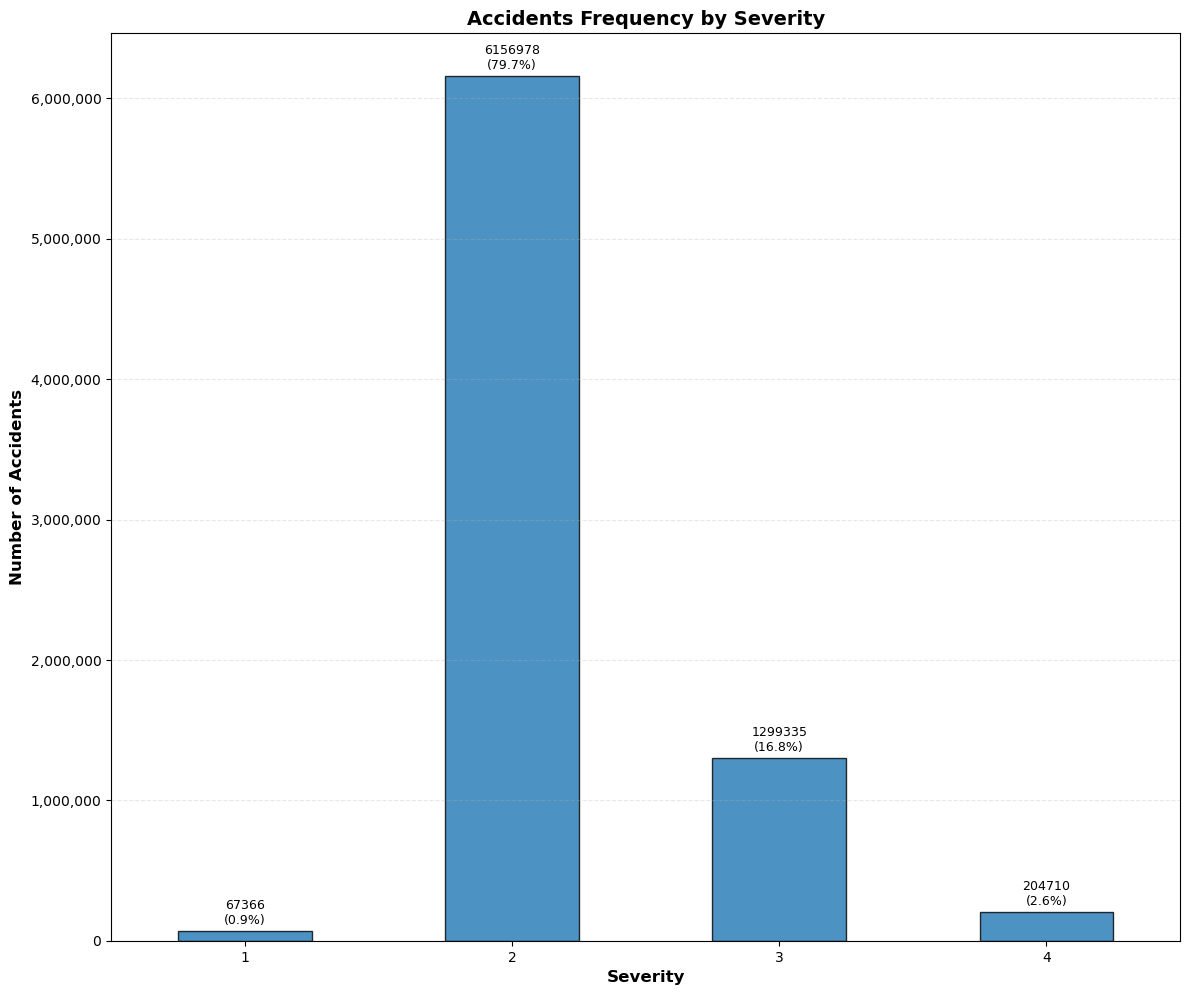

In [29]:
import matplotlib.ticker as mtick

# Counting number of accidents by severity level
severity = df_us_accidents_impute['severity'].value_counts().sort_index()

# Calculating percentage of severity for each severity category
total_severity = severity.sum()
severity_pct = (severity/total_severity * 100).round(1)

# Creating bar chart
ax = severity.plot(
    kind = 'bar',
    figsize = (12, 10),
    edgecolor = 'black',
    alpha = 0.8
)

# Show accident count (y-axis) in full numbers with commas
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Setting labels
ax.set_xlabel('Severity', fontsize = 12, fontweight='bold'),
ax.set_ylabel('Number of Accidents', fontsize = 12, fontweight='bold'),
ax.set_title('Accidents Frequency by Severity', fontsize=14, fontweight='bold')

# Adding value labels for each profile
for container in ax.containers:
    labels = [f'{count}\n({p}%)' for count, p in zip(severity, severity_pct)]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=9, padding=3)

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.xticks(rotation=0, ha='center')

# Saving the bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_severity_level.png'), bbox_inches='tight', dpi=300)

# Show bar chart
plt.show()

Bar plot of top 10 states by accident count

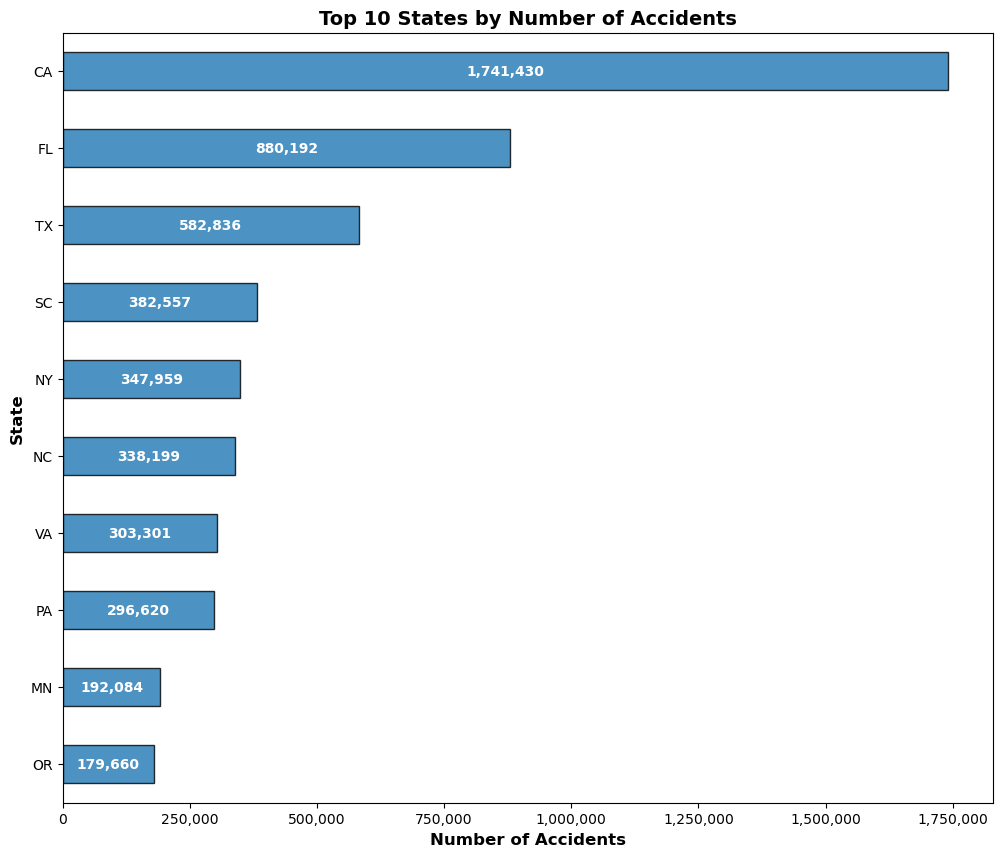

In [30]:
# Values for top 10 states by accident count
top_states = df_us_accidents_impute['state'].value_counts().head(10)

# Creating bar plot
ax = top_states.plot(
    kind = 'barh',
    figsize = (12, 10),
    edgecolor ='black',
    alpha = 0.8
)

# Show accident count (x-axis) in full numbers with commas
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Setting labels
plt.title('Top 10 States by Number of Accidents', fontsize=14, fontweight='bold')
plt.xlabel('Number of Accidents', fontsize = 12, fontweight='bold')
plt.ylabel('State', fontsize = 12, fontweight='bold')

# Adding accident count labels (with commas)
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"{int(x):,}" for x in container.datavalues],
        label_type='center',                                  # values inside bars
        fontsize=10,
        color="white",                                        # white text for contrast
        fontweight="bold"
    )

# Invert y-axis so the state with the most accidents is on top
plt.gca().invert_yaxis()

# Saving the bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_plot_top10.png'), bbox_inches='tight', dpi=300)

# Show bar chart
plt.show()

### **Step 8: Saving Cleaned Dataset**

In [31]:
# Export final dataframe "Cleaned Prepared Data" as pickle to reduce the file size

df_us_accidents_impute.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'us_accidents_6-1.pkl'))